Dataset (first 5 rows):
   year        income
0  1970  20993.428306
1  1971  20523.471398
2  1972  22895.377076
3  1973  25446.059713
4  1974  22731.693251

Predicted income for 2020: $58,945.55
Equation: income = 776.33 × year + -1509247.73


c:\Users\KLH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


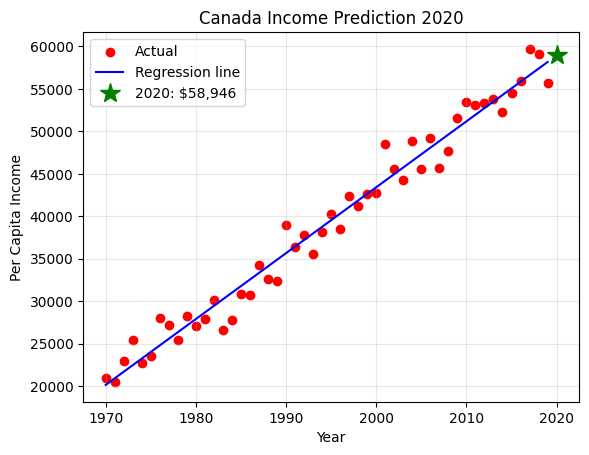

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(42)
years = np.arange(1970, 2020)
income = 20000 + (years - 1970) * 800 + np.random.normal(0, 2000, len(years))

df = pd.DataFrame({'year': years, 'income': income})
print("Dataset (first 5 rows):")
print(df.head())

X = df[['year']]
y = df['income']
model = LinearRegression()
model.fit(X, y)

pred_2020 = model.predict([[2020]])[0]
print(f"\nPredicted income for 2020: ${pred_2020:,.2f}")
print(f"Equation: income = {model.coef_[0]:.2f} × year + {model.intercept_:.2f}")

plt.scatter(df['year'], df['income'], color='red', label='Actual')
plt.plot(df['year'], model.predict(X), 'b-', label='Regression line')
plt.plot(2020, pred_2020, 'g*', markersize=15, label=f'2020: ${pred_2020:,.0f}')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.title('Canada Income Prediction 2020')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

data = pd.DataFrame({
    'Age': [25, 34, 45, 23, 31, 29, 38, 41, 27, 36],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'Income': [35, 60, 80, 40, 50, 45, 75, 90, 30, 65],
    'Browsing_Time': [10, 25, 5, 30, 20, 15, 12, 5, 40, 22],
    'Purchased': [0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
})

le = LabelEncoder()
data['Gender_encoded'] = le.fit_transform(data['Gender'])

X = data[['Age', 'Gender_encoded', 'Income', 'Browsing_Time']]
y = data['Purchased']

model = LogisticRegression()
model.fit(X, y)

predictions = model.predict(X)
accuracy = accuracy_score(y, predictions)

print("Dataset:")
print(data[['Age', 'Gender', 'Income', 'Browsing_Time', 'Purchased']])
print(f"\nModel Accuracy: {accuracy:.1%}")

new_data = pd.DataFrame({
    'Age': [28, 40],
    'Gender': ['F', 'M'],
    'Income': [55, 70],
    'Browsing_Time': [18, 8]
})
new_data['Gender_encoded'] = le.transform(new_data['Gender'])

X_new = new_data[['Age', 'Gender_encoded', 'Income', 'Browsing_Time']]
new_predictions = model.predict(X_new)

print("\nNew Customer Predictions:")
for i in range(len(new_data)):
    status = "WILL PURCHASE" if new_predictions[i] == 1 else "WILL NOT PURCHASE"
    print(f"Customer {i+1}: {status}")

Dataset:
   Age Gender  Income  Browsing_Time  Purchased
0   25      M      35             10          0
1   34      F      60             25          1
2   45      M      80              5          0
3   23      F      40             30          1
4   31      M      50             20          1
5   29      F      45             15          0
6   38      M      75             12          1
7   41      F      90              5          0
8   27      M      30             40          1
9   36      F      65             22          1

Model Accuracy: 100.0%

New Customer Predictions:
Customer 1: WILL PURCHASE
Customer 2: WILL NOT PURCHASE
